* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [39]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [415]:
df1 = pd.read_csv('C:\workspace/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('C:\workspace/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('C:\workspace/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('C:\workspace/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('C:\workspace/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('C:\workspace/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [4]:
# 컨트롤 엔터: 코드실행
#shift + enter: 코드실행 다음코드블록 이동
#초록색이 편집모드
#파란색인 상태에서는 b는 코드블록을 아래 만들어줌
#파란색인 상태에서는 a코드블록을 위에 만들어줌
#파란색인 상태 dd를 누르면 삭제
#파란색인 상태 m 누르면 마크 다운모드

### 데이터 연결/확인
* concat

In [423]:
# concat
df=pd.concat([df1,df2,df3,df4,df5,df6])

In [424]:
# head
df.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99


In [425]:
#tail
df.tail(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445941,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,00437,대흥역 1번출구,0,368.0,430.00
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [426]:
# 데이터 크기
df.count()

자전거번호       13613873
대여일시        13613873
대여 대여소번호    13613873
대여 대여소명     13613873
대여거치대       13613873
반납일시        13613873
반납대여소번호     13613873
반납대여소명      13613873
반납거치대       13613873
이용시간        13613873
이용거리        13613604
dtype: int64

In [402]:
# 데이터 정보(사용메모리)
df.dtypes

이용거리        float64
자전거번호        object
대여일시         object
대여 대여소번호    float64
대여 대여소명      object
대여거치대        object
반납일시         object
반납대여소번호      object
반납대여소명       object
반납거치대       float64
이용시간        float64
대여건수        float64
dtype: object

## 데이터 전처리

### 불필요한 컬럼 제거

In [427]:
# 자전거번호, 대여거치대, 반납거치대 제거
df.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0


In [428]:
df0=df.drop(columns=['자전거번호'])
df0=df0.drop(columns=['대여거치대'])
df0=df0.drop(columns=['반납거치대'])
df0.head(1)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.0


### 자료형 확인/변경

In [405]:
# 자료형 확인
df0.head(1)

,이용거리,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,대여건수
2021-01-01 00:00:00,46135287.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호

In [407]:
df0.astype({'대여 대여소번호':'category','반납대여소번호':'category'})
df0.dtypes

이용거리        float64
대여일시         object
대여 대여소번호    float64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
대여건수        float64
dtype: object

In [408]:
# 메모리 용량 확인

In [409]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6426465 entries, 2021-01-01 00:00:00 to 2021-06-30 00:00:00
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   이용거리      float64
 1   대여일시      object 
 2   대여 대여소번호  float64
 3   대여 대여소명   object 
 4   반납일시      object 
 5   반납대여소번호   object 
 6   반납대여소명    object 
 7   이용시간      float64
 8   대여건수      float64
dtypes: float64(4), object(5)
memory usage: 554.8+ MB


In [410]:
# datetime형으로 변경 : 대여일시,반납일시

In [433]:
df0['대여일시'] = pd.to_datetime(df0['대여일시'], infer_datetime_format=True)

df0['반납일시'] = pd.to_datetime(df0['반납일시'], infer_datetime_format=True)

In [ ]:
# 자료형 변경 확인

In [ ]:
df0['반납일시'][0]

## 결측치 확인/처리

In [429]:
# 결측치 확인
df0.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시          0
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [430]:
# 결측치 제거
df0 = df0.dropna(axis=0,how='any')
df0

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05
...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00


In [431]:
# 결측치 확인
df0.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [448]:
df0['대여날짜'] = pd.to_datetime(df0['대여일시'].dt.date)

In [449]:
df0.head(3)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,반납대여소번호처리,대여건수,대여요일,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,NaN,1,Sat,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,NaN,1,Mon,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,NaN,1,Wed,2021-01-13


## 대여날짜 별 대여 건수
* groupby
* to_frame

In [326]:
# 대여날짜 별 대여건수 추출
#df1 = pd.DataFrame()
def my_sum(s):
    return np.sum(s)
def nothing(s):
    return s
df0['대여건수'] = 1
df5 = df0.groupby('대여날짜').agg({'대여건수':my_sum})
df5

,대여건수
대여날짜,
2021-02-01,40906
2021-02-02,30919
2021-02-03,30798
2021-02-04,20063
2021-02-05,37437
...,...
2021-04-26,121481
2021-04-27,103397
2021-04-28,114792


In [ ]:
# 대여날짜 별 대여건수 시각화


## 대여날짜 별 이용시간
* groupby
* to_frame

In [327]:
# 대여날짜 별 이용시간 추출
df0['대여건수'] = 1
df6 = df0.groupby('대여날짜').agg({'이용시간':np.sum})
df6

,이용시간
대여날짜,
2021-02-01,979272.0
2021-02-02,634467.0
2021-02-03,659353.0
2021-02-04,450178.0
2021-02-05,901524.0
...,...
2021-04-26,3192879.0
2021-04-27,2364699.0
2021-04-28,2898352.0


In [250]:
# 대여날짜 별 이용시간 시각화

## 대여날짜 별 이용 거리

In [328]:
# 대여날짜 별 이용거리 추출
df0['대여건수'] = 1
df7 = df0.groupby('대여날짜').agg({'이용거리':my_sum})
df7

,이용거리
대여날짜,
2021-02-01,1.141294e+08
2021-02-02,7.339086e+07
2021-02-03,7.457503e+07
2021-02-04,4.795721e+07
2021-02-05,1.015744e+08
...,...
2021-04-26,3.761672e+08
2021-04-27,2.783101e+08
2021-04-28,3.461246e+08


In [329]:
# 대여날짜 별 이용거리 시각화
from datetime import time

## 데이터프레임 합치기

In [330]:
df_0 = df5.join(df6)
df_add=df_0.join(df7)
df_add

,대여건수,이용시간,이용거리
대여날짜,,,
2021-02-01,40906,979272.0,1.141294e+08
2021-02-02,30919,634467.0,7.339086e+07
2021-02-03,30798,659353.0,7.457503e+07
2021-02-04,20063,450178.0,4.795721e+07
2021-02-05,37437,901524.0,1.015744e+08
...,...,...,...
2021-04-26,121481,3192879.0,3.761672e+08
2021-04-27,103397,2364699.0,2.783101e+08
2021-04-28,114792,2898352.0,3.461246e+08


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [269]:
df0['대여시간'] = df0['대여일시'].dt.hour
df0['반납시간'] = df0['반납일시'].dt.hour

In [270]:
df0

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여건수,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,1,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,1,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,1,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,1,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,1,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,1,22,4
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,1,22,4
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,1,22,4
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,1,22,4


## 시간대별 대여/반납 현황

In [292]:
# 시간대별 대여현황
a = []
for i in range(24):
    a.append(i)
df_1 = df0.groupby('대여시간').agg({'대여건수':np.sum})
df_1['시간'] = a

In [293]:
df_1

,대여건수,시간
대여시간,,
0,240025,0
1,158905,1
2,103629,2
3,68710,3
4,55391,4
5,84713,5
6,188920,6
7,486775,7
8,808506,8


In [295]:
# 시간대별 반납현황
df_2 = df0.groupby('반납시간').agg({'대여건수':np.sum})
df_2
df_2['시간'] = a
df_2

,대여건수,시간
반납시간,,
0,290169,0
1,190954,1
2,125912,2
3,80243,3
4,60368,4
5,73983,5
6,152003,6
7,389007,7
8,817076,8


## 시각화

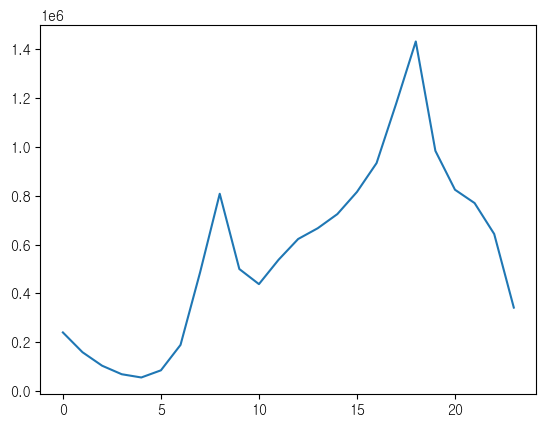

In [300]:
# 시간대별 공공자전거 대여건수 시각화
#plt.plot(df0['반납시간'],df_1['대여건수'])
plt.plot(df_1['시간'],df_1['대여건수'])
plt.title= '이용자수'
plt.xlabel='시간'
plt.ylabel='고객수'
plt.show()


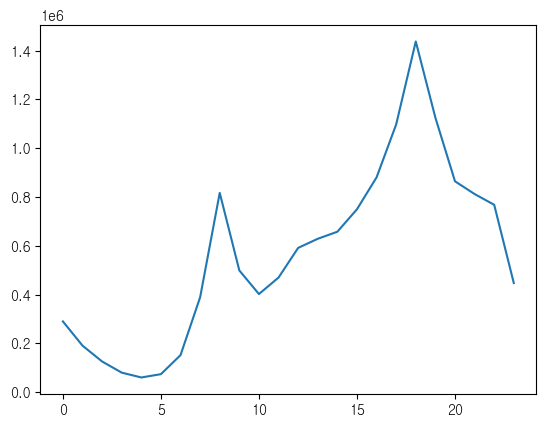

In [301]:
# 시간대별 공공자전거 반납건수 시각화
plt.plot(df_2['시간'],df_2['대여건수'])
plt.title= '이용자수'
plt.xlabel='시간'
plt.ylabel='고객수'
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [380]:
# 대여 대여소번호 갯수
df0['대여 대여소번호'].nunique()

2385

In [349]:
# 반납대여소번호 갯수
df0['반납대여소번호'].describe()

count     6425791
unique       2385
top         00502
freq        41722
Name: 반납대여소번호, dtype: object

In [386]:
# 반납대여소 번호 처리 (str형으로 변환)
df0['반납대여소번호'].astype('str')

0          01554
1          01981
2          01360
3          02639
4          01708
           ...  
3027526    01020
3027527    02429
3027528    03803
3027529    02179
3027530    00375
Name: 반납대여소번호, Length: 6425791, dtype: object

In [434]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)
df0['반납대여소번호처리'] = df0['반납대여소번호'].str.strip('0')

In [447]:
# 반납대여소 번호 처리 (int형으로 변환)
#df0 = df0['반납대여소번호처리'].astype(int)
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613604 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column     Dtype         
---  ------     -----         
 0   대여일시       datetime64[ns]
 1   대여 대여소번호   int64         
 2   대여 대여소명    object        
 3   반납일시       datetime64[ns]
 4   반납대여소번호    object        
 5   반납대여소명     object        
 6   이용시간       float64       
 7   이용거리       float64       
 8   반납대여소번호처리  object        
 9   대여건수       int64         
 10  대여요일       object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 1.2+ GB


In [445]:
# 반납대여소 번호 처리 (category형으로 변환)
#df0 = df0['반납대여소번호처리'].astype(category)

## 대여건수가 가장 많은 대여소 best10

In [436]:
# value_counts
df0['대여건수'] = 1
df10 = df0.groupby('대여 대여소명').agg({'대여건수':my_sum})
df10.sort_values(by='대여건수', ascending =False,inplace =True)
df10.head(10)

,대여건수
대여 대여소명,
여의나루역 1번출구 앞,68994
뚝섬유원지역 1번출구 앞,68588
마포구민체육센터 앞,43535
봉림교 교통섬,43368
롯데월드타워(잠실역2번출구 쪽),37149
마곡나루역 2번 출구,36988
신대방역 2번 출구,31971
당산육갑문,31527
IFC몰,31443


## 반납건수가 가장 많은 대여소 best10

In [344]:
# value_counts
df0['대여건수'] = 1
df10 = df0.groupby('반납대여소명').agg({'대여건수':my_sum})
df10.sort_values(by='대여건수', ascending =False,inplace =True)
df10.head(10)

,대여건수
반납대여소명,
뚝섬유원지역 1번출구 앞,41719
여의나루역 1번출구 앞,36960
마포구민체육센터 앞,24027
봉림교 교통섬,20752
IFC몰,17735
롯데월드타워(잠실역2번출구 쪽),17553
당산육갑문,16950
옥수역 3번출구,16321
마곡나루역 2번 출구,16072


## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

### 반납 현황

In [437]:
# value_counts
df0[['반납대여소번호처리', '반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호처리,반납대여소명,
502,뚝섬유원지역 1번출구 앞,75867
207,여의나루역 1번출구 앞,66290
152,마포구민체육센터 앞,48347
2102,봉림교 교통섬,42167
121,롯데월드타워(잠실역2번출구 쪽),35260
...,...,...
703,오목교??7번출구 앞,1
2076,노?褥し怜貶?입구,1
702,목4동주민센??옆,1


### 요일별 대여현황

In [438]:
#요일컬럼 추가 : strftime('%a')
df0['대여요일'] = df0['대여일시'].dt.strftime('%a')

In [439]:
# value_counts
df0['대여요일'].value_counts()
df0

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,반납대여소번호처리,대여건수,대여요일
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,NaN,1,Sat
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,NaN,1,Mon
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,NaN,1,Wed
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,NaN,1,Thu
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,NaN,1,Mon
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,126,1,Wed
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,437,1,Wed
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,437,1,Wed
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2526,1,Wed


### 이용시간 통계

In [440]:
# 이용시간 평균
df['이용시간'].mean()

27.339079200312792

In [441]:
# 이용시간 최대
df0['이용시간'].max()

2323.0

In [442]:
# 이용시간 최소
df0['이용시간'].min()

1.0

In [444]:
# 전체데이터 이용시간 평균
df0['이용시간'].mean()

27.27823322905529